In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

### Application: The Perpetual Inventory Method

The stock of physical capital is a fundamental component of many macroeconomic models but measuring, and therefore acquiring data on, the value of a country's capital stock is hard. The challenge arise because it is hard to estimate the value of something that is not changing ownership in a transaction. What is value of a high-rise apartment building that has had the same owner for 50 years?

One way to overcome this challenge is to use the **perpetual inventory method**. The perpetual inventory method is based on the law of motion of the capital stock:

\begin{align}
K_{t+1} & = I_t + (1-\delta) K_t
\end{align}

where $K_t$ denotes physical capital, $I_t$ denotes investment (purchases of new capital), and $\delta$ denotes the rate of depreciation. Give $K_0$ and data on investment $I_0, I_1, \ldots,$, the the capital stock in periods $1, 2, \ldots$ can be computed iteratively. To obtain $K_0$, the method assumes that the economy is in  a steady state in the initial year. Recall that in the steady state:

\begin{align}
I & = \delta K
\end{align}

So, set $K_0 = \delta^{-1} I_0$.

Steps:

1. Obtain real investment data (https://fred.stlouisfed.org/series/GPDICA)
2. Select a value for the depreciation rate $\delta$. 0.1 is a standard choice.
3. Initialize an array of zeros (or an empty array) to store capital values
4. Set the first value of the captial array equal to the $\delta^{-1} I_0$
5. Iterate over the values in the investment data to compute the remaining values of capital.

Read Timothy Kehoe's notes (http://users.econ.umn.edu/~tkehoe/classes/GrowthAccountingNotes.pdf) for more background on the perpetual inventory method if you're interested.

In [2]:
# Import real investment data from FRED into a DataFrame called 'data' (PROVIDED)
data = pd.read_csv('https://fred.stlouisfed.org/data/GPDICA.txt',sep='\s+',skiprows=13,index_col=0,parse_dates=True)

# Set the columns attribute of data to ['Investment']
data.columns = ['Investment']

# Set the index.name attribute of data to 'Date' (i.e., data.index.name)
data.index.name='Date'

# Create a variable called 'delta' that stores the value for delta
delta = 0.1

# Create a variable called 'capital' equal to an array of zeros with the same length as data
capital = np.arange(len(data))

# Set the initial value of capital variable equal to the initial value of investment divided by delta
capital[0] = data['Investment'].iloc[0]/delta

# Iterate (i.e., use a for loop) over i in range(len(capital)-1) to construct values in the capital array
for i in range(len(capital)-1):
    capital[i+1] = data['Investment'].iloc[i] + (1-delta)*capital[i]
    
# Add a 'Capital' column to data
data['Capital'] = capital

# Divide data by 1000 so that the values are in units are in trillions of $ (instead of billions)
data = data/1000

# Print the first 5 rows of data
print(data.head())

            Investment  Capital
Date                           
1929-01-01    0.120381    1.203
1930-01-01    0.081988    1.203
1931-01-01    0.053297    1.164
1932-01-01    0.019658    1.100
1933-01-01    0.026589    1.009


Now construct a figure that contains a plot of capital in the top panel and investment in the bottom panel.

1. The figure should have dimensions $12\times 8$.
2. Y-axis labels for investment and capital should both be "trillions of chained dollars"
3. Each axis should have an appropriate title.

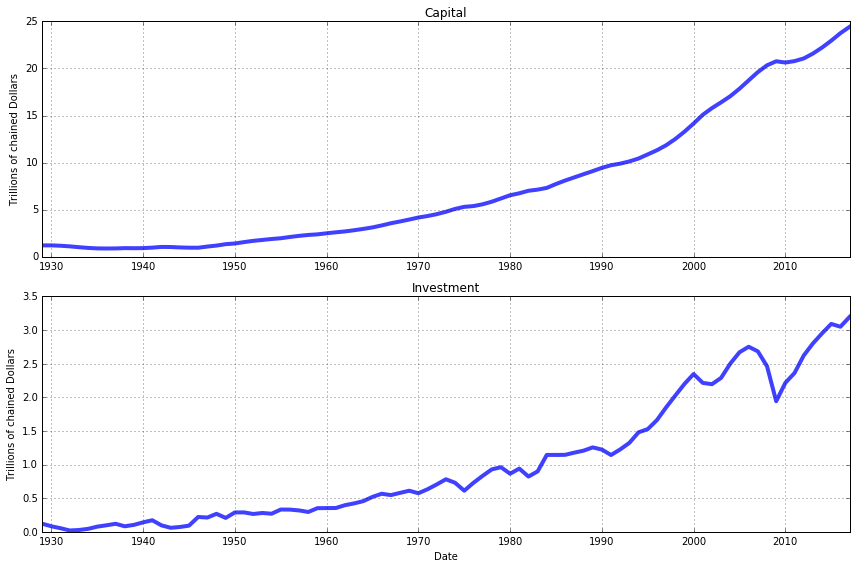

In [3]:
# Create figure
fig = plt.figure(figsize=(12,8))

# Construct the plot of capital
ax1 = fig.add_subplot(2,1,1)
ax1.plot(data.index,data.Capital,lw=4,alpha=0.75)
ax1.set_ylabel('Trillions of chained Dollars')
ax1.set_title('Capital')
ax1.grid()

# Construct the plot of investment
ax2 = fig.add_subplot(2,1,2)
ax2.plot(data.index,data.Investment,lw=4,alpha=0.75)
ax2.set_ylabel('Trillions of chained Dollars')
ax2.set_xlabel('Date')
ax2.set_title('Investment')
ax2.grid()

# Use fig.tight_layout() to adjust whitespace
fig.tight_layout()

**Question**

1. Why does the computed capital series fluctuate less than the investment data?
2. Given that there are about 325 million people in the US, does the computed value in the last year look large, small, or about right on a per capita basis?

**Answer**

1. Because 10 percent rate of capital accumulation implies an autoregressive coefficent on capital of 0.9 so changes in capital are highly persistent.<!-- answer -->
2. 25 trillion divided by 325 million is about 77,000 which seems to be in the right ballpark. Note that that the amount of capital in the US *per worker* will be an order of magnitude higher since there is a stubstantial share of people not in the workforce: e.g., children, retired persons, institutionalized persons.<!-- answer -->